In [1]:
!pip install urllib3
!pip install spacy
!python3 -m spacy download en_core_web_sm
!pip install nltk
!pip install beautifulsoup4
!pip install textacy
!pip install feedparser
!pip install pyLDAvis
!pip uninstall pandas
!pip install pandas==1.3.4

     |████████████████████████████████| 12.0 MB 1.9 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
     |████████████████████████████████| 200 kB 5.4 MB/s 
     |████████████████████████████████| 481 kB 44.4 MB/s 
     |████████████████████████████████| 2.0 MB 38.7 MB/s 
     |████████████████████████████████| 132 kB 49.6 MB/s 
     |████████████████████████████████| 6.0 MB 34.6 MB/s 
     |████████████████████████████████| 451 kB 51.5 MB/s 
     |████████████████████████████████| 10.1 MB 32.7 MB/s 
     |████████████████████████████████| 181 kB 61.0 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 628 kB 49.1 MB/s 
  Created wheel for cytoolz: filename=cytoolz-0.11.2-cp37-cp37m-linux_x86_64.whl size=1230801 sha256=30dfd98e019eb8d05b8a8980368ce7d2e071103a41129b2ee3e0e61c41dbcad8
  Stored in directory: /root/.cache/pip/wheels/38/70/71/ca13ea3d36ccd0b3d0ec7d7a4ca67522048d695b556

Found existing installation: pandas 1.3.5
Uninstalling pandas-1.3.5:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pandas-1.3.5.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas/*
Proceed (y/n)? y
  Successfully uninstalled pandas-1.3.5
     |████████████████████████████████| 11.3 MB 5.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.4 which is incompatible.


In [1]:
# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')


#Import the necessary packages
import pickle
import pandas as pd
import numpy as np
from datetime import datetime
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.corpus import stopwords
import gensim
from gensim.utils import simple_preprocess
from gensim.corpora.dictionary import Dictionary
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
#import spacy
import string
import re
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [3]:
#Load the krebs dataset (saved as a pickle file) into a dataframe df
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/CS F366/NPR-precovid-dataset.csv")
print(df.head())

  web-scraper-order  ...                                           Abstract
0   1641463680-3225  ...  The teeth get their strength from architecture...
1   1641463633-3054  ...                                                NaN
2   1641464559-6398  ...                                                NaN
3   1641463691-3267  ...  Janis Gold: I isolated the data Renee uploaded...
4   1641464017-4437  ...                                                NaN

[5 rows x 4 columns]


In [4]:
df = df[["Title", "Abstract"]]

In [5]:
#Inspect the dataframe
print(len(df.index))
print(df.head())

10150
                                      Title                                           Abstract
0  Friday Squid Blogging: Jumbo Squid Teeth  The teeth get their strength from architecture...
1     Reducing the Risk of Human Extinction                                                NaN
2            On Cyber Arms Control Treaties                                                NaN
3                     Blowfish on 24, Again  Janis Gold: I isolated the data Renee uploaded...
4                         Hacking Lotteries                                                NaN


In [ ]:
#Set the index to the date column
#from datetime import datetime
#df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')
#df = df.set_index('Date')

In [6]:



df['Abstract'] = df['Abstract'].replace(np.nan, '')
df['Abstract']

0        The teeth get their strength from architecture...
1                                                         
2                                                         
3        Janis Gold: I isolated the data Renee uploaded...
4                                                         
                               ...                        
10145    The rapid and frenetic shift to commerce built...
10146    It was in 1986 that brothers Basit and Amjad F...
10147    Security start-up Kindsight is in the late sta...
10148    (Editor’s note: In this guest post, Joel deJes...
10149                                                     
Name: Abstract, Length: 10150, dtype: object

In [7]:
#Define a function that removes urls from text using regex
def remove_urls(text):
    URLess_string = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)
    return URLess_string

In [8]:
#Define a function that removes punctuation from the text which may impact the model's ability to extract topics
def remove_punctuation(text):
    no_punct = re.sub(r'[^\w\s]', '', text)
    return no_punct

In [9]:
#Apply the remove url function to the body series
df['Abstract'] = df['Abstract'].apply(lambda x: remove_urls(x))

In [10]:
#Apply the remove punctuation function to the body series
df['Abstract'] = df['Abstract'].apply(lambda x: remove_punctuation(x))


In [11]:
data = df.Abstract.values.tolist()

In [12]:
print(df.head())

                                      Title                                           Abstract
0  Friday Squid Blogging: Jumbo Squid Teeth  The teeth get their strength from architecture...
1     Reducing the Risk of Human Extinction                                                   
2            On Cyber Arms Control Treaties                                                   
3                     Blowfish on 24, Again  Janis Gold I isolated the data Renee uploaded ...
4                         Hacking Lotteries                                                   


Improving Interpretability using n-grams:

In [13]:
# Added on 25-11
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_documents([comment.split() for comment in df.Abstract])
# Filter only those that occur at least 10 times
finder.apply_freq_filter(10)
bigram_scores = finder.score_ngrams(bigram_measures.pmi)

In [14]:
# added on 25-11
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = nltk.collocations.TrigramCollocationFinder.from_documents([comment.split() for comment in df.Abstract])
# Filter only those that occur at least 50 times
finder.apply_freq_filter(5)
trigram_scores = finder.score_ngrams(trigram_measures.pmi)


In [15]:
bigram_pmi = pd.DataFrame(bigram_scores)
bigram_pmi.columns = ['bigram', 'pmi']
bigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)

In [16]:
trigram_pmi = pd.DataFrame(trigram_scores)
trigram_pmi.columns = ['trigram', 'pmi']
trigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)

In [17]:
# Filter for bigrams with only noun-type structures
def bigram_filter(bigram):
    tag = nltk.pos_tag(bigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['NN']:
        return False
    if bigram[0] in stopwords.words('english') or bigram[1] in stopwords.words('english'):
        return False
    if 'n' in bigram or 't' in bigram:
        return False
    if 'PRON' in bigram:
        return False
    return True

In [18]:
def trigram_filter(trigram):
    tag = nltk.pos_tag(trigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['JJ','NN']:
        return False
    if trigram[0] in stopwords.words('english') or trigram[-1] in stopwords.words('english') or trigram[1] in stopwords.words('english'):
        return False
    if 'n' in trigram or 't' in trigram:
         return False
    if 'PRON' in trigram:
        return False
    return True 

In [19]:
# Can set pmi threshold to whatever makes sense - eyeball through and select threshold where n-grams stop making sense
# choose top 500 ngrams in this case ranked by PMI that have noun like structures
filtered_bigram = bigram_pmi[bigram_pmi.apply(lambda bigram: bigram_filter(bigram['bigram']) and bigram.pmi > 5, axis = 1)][:500]

filtered_trigram = trigram_pmi[trigram_pmi.apply(lambda trigram: trigram_filter(trigram['trigram']) and trigram.pmi > 5, axis = 1)][:500]


bigrams = [' '.join(x) for x in filtered_bigram.bigram.values if len(x[0]) > 2 or len(x[1]) > 2]
trigrams = [' '.join(x) for x in filtered_trigram.trigram.values if len(x[0]) > 2 or len(x[1]) > 2 and len(x[2]) > 2]

In [20]:
bigrams[:10]

['Spam Nation',
 'Internal Revenue',
 'al Qaeda',
 'acceptance slot',
 'Home Depot',
 'seat belt',
 'Hacking Team',
 'blogger Brian',
 'civil liberties',
 'venture capital']

In [21]:
trigrams[:10]

['Interactive Advertising Bureau',
 'Your Own Device',
 'blogger Brian Krebs',
 'Foreign Intelligence Surveillance',
 'book Spam Nation',
 'Syrian Electronic Army',
 'video recorders DVRs',
 'Research Projects Agency',
 'distributed denialofservice DDoS',
 'Revenue Service IRS']

In [22]:
# Concatenate n-grams
def replace_ngram(x):
    for gram in trigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    for gram in bigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    return x

In [23]:
reviews_w_ngrams = df.copy()

In [24]:
reviews_w_ngrams.Abstract = reviews_w_ngrams.Abstract.map(lambda x: replace_ngram(x))

In [25]:
# tokenize reviews + remove stop words + remove names + remove words with less than 2 characters
# english_names not implemented
reviews_w_ngrams = reviews_w_ngrams.Abstract.map(lambda x: [word for word in x.split() if word not in stopwords.words('english') and len(word) > 2 and word not in ['cybersecurity','information','security','cyber','research','paper','study']])

In [26]:
reviews_w_ngrams.head()

0    [The, teeth, get, strength, architecture, seri...
1                                                   []
2                                                   []
3    [Janis, Gold, isolated, data, Renee, uploaded,...
4                                                   []
Name: Abstract, dtype: object

In [27]:
# Filter for only nouns
def noun_only(x):
    pos_comment = nltk.pos_tag(x)
    filtered = [word[0] for word in pos_comment if word[1] in ['NN']]
    # to filter both noun and verbs
    #filtered = [word[0] for word in pos_comment if word[1] in ['NN','VB', 'VBD', 'VBG', 'VBN', 'VBZ']]
    return filtered

In [28]:
final_reviews = reviews_w_ngrams.map(noun_only)
df['Abstract']=final_reviews
# final_reviews.head()
df.head()

,Title,Abstract
0,Friday Squid Blogging: Jumbo Squid Teeth,"[teeth, strength, architecture, series, tooth,..."
1,Reducing the Risk of Human Extinction,[]
2,On Cyber Arms Control Treaties,[]
3,"Blowfish on 24, Again","[cant, get, header]"
4,Hacking Lotteries,[]


In [29]:
#Define a function that takes input string, converts it all to lower case then tokenizes it using nltk.tokenize
def word_tokenizer(text):
    tokens = nltk.word_tokenize(text.lower())
    return tokens

In [ ]:
#Apply the tokenizer function to the entire Body series
# df.Body = df.Body.apply(lambda x: word_tokenizer(x))

In [30]:
df.head()

,Title,Abstract
0,Friday Squid Blogging: Jumbo Squid Teeth,"[teeth, strength, architecture, series, tooth,..."
1,Reducing the Risk of Human Extinction,[]
2,On Cyber Arms Control Treaties,[]
3,"Blowfish on 24, Again","[cant, get, header]"
4,Hacking Lotteries,[]


In [31]:
#Save the preprocessed data to a pickle file: 'df_preprocessed.pickle'
with open('df_preprocessed.pickle', 'wb') as f:
    pickle.dump(df, f)

In [ ]:
# df.index = pd.to_datetime(df.index)
#df = df.sort_index()

#df.head()

#df = df['2019-12-31':]
# print(df.size())

In [32]:
# Create a dictionary of all unique tokens by passing df.Body to the Dictionary method
df.count
dictionary = corpora.Dictionary(df.Abstract)


In [ ]:
#Each unique token is mapped to an id number e.g. 'chip': 140
#dictionary.token2id

In [33]:
#Turn the dictionary into a corpus (a Bag of Words) that contains the word id and its frequency in each document (article in our case)
texts = df.Abstract
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
# Create a dictionary of all unique tokens by passing df.Title to the Dictionary method
#dictionary_from_titles = corpora.Dictionary(df.Title)

In [ ]:
#Turn the dictionary into a corpus (a Bag of Words) that contains the word id and its frequency in each document (article in our case)
#texts_from_titles = df.Title
#corpus_from_titles = [dictionary_from_titles.doc2bow(text) for text in texts_from_titles]

In [ ]:
#Create an LDA model from the Body corpus which extracts 10 topics
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=42, update_every=1, chunksize=100, passes=10, iterations=100, alpha='auto', per_word_topics=True)

In [ ]:
lda_model.print_topics()

[(0,
  '0.045*"problem" + 0.042*"device" + 0.024*"case" + 0.024*"security_firm" + 0.024*"address" + 0.018*"iPhone" + 0.017*"message" + 0.017*"team" + 0.017*"response" + 0.014*"record"'),
 (1,
  '0.063*"company" + 0.048*"time" + 0.044*"business" + 0.032*"year" + 0.025*"email" + 0.020*"account" + 0.019*"news" + 0.015*"survey" + 0.014*"money" + 0.013*"spam"'),
 (2,
  '0.071*"privacy" + 0.046*"technology" + 0.033*"work" + 0.019*"point" + 0.018*"intelligence" + 0.017*"home" + 0.016*"application" + 0.016*"cloud" + 0.015*"web" + 0.015*"issue"'),
 (3,
  '0.067*"network" + 0.045*"malware" + 0.043*"industry" + 0.038*"threat" + 0.029*"week" + 0.027*"state" + 0.021*"credit" + 0.016*"target" + 0.015*"get" + 0.015*"botnet"'),
 (4,
  '0.060*"use" + 0.048*"online" + 0.033*"system" + 0.024*"program" + 0.023*"group" + 0.020*"management" + 0.017*"place" + 0.016*"personal_information" + 0.016*"traffic" + 0.015*"ability"'),
 (5,
  '0.061*"access" + 0.041*"software" + 0.035*"attack" + 0.031*"number" + 0.026

In [ ]:
coherence_model_lda_body = CoherenceModel(model=lda_model, texts=df.Abstract, dictionary=dictionary, coherence='c_v')
coherence_lda_body = coherence_model_lda_body.get_coherence()

print('\nCoherence score from Body: ', coherence_lda_body)


Coherence score from Body:  0.3348716626149433


In [ ]:
# #for (chunksize - 100 to 600 in 50 intervals, passes 10 to 50 in 10 intervals, iterations = 50 to 600 in 50 intervals)
# for cs in range(100, 601, 50):
#   lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=42, update_every=1, chunksize=cs, passes=20, iterations=400, alpha='auto', per_word_topics=True)
#   coherence_model_lda_body = CoherenceModel(model=lda_model, texts=df.Abstract, dictionary=dictionary, coherence='c_v')
#   coherence_lda_body = coherence_model_lda_body.get_coherence()
#   print('Chunksize: ', cs, ',Coherence score: ', coherence_lda_body)

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, update_every=1, chunksize=300, passes=40,iterations=400, alpha='auto', per_word_topics=True)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
        
    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=df.Abstract, limit=30, start=2, step=2)

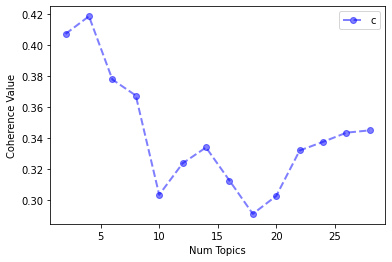

<Figure size 432x288 with 0 Axes>

In [ ]:
limit=30; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values, 'bo--', linewidth=2, markersize=6, alpha=0.5)
plt.xlabel("Num Topics")
plt.ylabel("Coherence Value")
plt.legend(("coherence_values"), loc='best')
#plt.title('Coherence Value as a function of topic numbers\n from Krebsonsecurity Title Corpus')
plt.show()
plt.savefig('Coherence_values')

In [ ]:
 for m, cv in zip(x, coherence_values):
    print('Num Topics =', m, 'has Coherence ValueErrorlue of', round(cv,4))

Num Topics = 2 has Coherence ValueErrorlue of 0.407
Num Topics = 4 has Coherence ValueErrorlue of 0.4184
Num Topics = 6 has Coherence ValueErrorlue of 0.3776
Num Topics = 8 has Coherence ValueErrorlue of 0.3673
Num Topics = 10 has Coherence ValueErrorlue of 0.3032
Num Topics = 12 has Coherence ValueErrorlue of 0.3235
Num Topics = 14 has Coherence ValueErrorlue of 0.3338
Num Topics = 16 has Coherence ValueErrorlue of 0.3124
Num Topics = 18 has Coherence ValueErrorlue of 0.2909
Num Topics = 20 has Coherence ValueErrorlue of 0.3025
Num Topics = 22 has Coherence ValueErrorlue of 0.3318
Num Topics = 24 has Coherence ValueErrorlue of 0.3374
Num Topics = 26 has Coherence ValueErrorlue of 0.3433
Num Topics = 28 has Coherence ValueErrorlue of 0.3448


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_chunksize in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=42, update_every=1, chunksize=num_chunksize, passes=10,iterations=100, alpha='auto', per_word_topics=True)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
        
    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=df.Abstract, limit=1000, start=600, step=50)

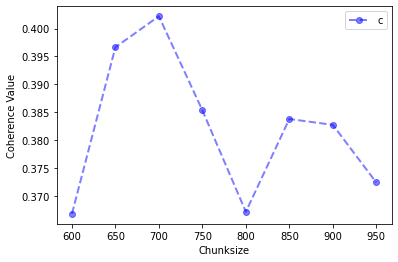

<Figure size 432x288 with 0 Axes>

In [ ]:
limit=1000; start=600; step=50;
x = range(start, limit, step)
plt.plot(x, coherence_values, 'bo--', linewidth=2, markersize=6, alpha=0.5)
plt.xlabel("Chunksize")
plt.ylabel("Coherence Value")
plt.legend(("coherence_values"), loc='best')
#plt.title('Coherence Value as a function of topic numbers\n from Krebsonsecurity Title Corpus')
plt.show()
plt.savefig('Coherence_values')

In [ ]:
for m, cv in zip(x, coherence_values):
    print('chunksize =', m, 'has Coherence ValueErrorlue of', round(cv,4))

chunksize = 100 has Coherence ValueErrorlue of 0.4041
chunksize = 150 has Coherence ValueErrorlue of 0.4159
chunksize = 200 has Coherence ValueErrorlue of 0.4094
chunksize = 250 has Coherence ValueErrorlue of 0.3569
chunksize = 300 has Coherence ValueErrorlue of 0.4094
chunksize = 350 has Coherence ValueErrorlue of 0.3611
chunksize = 400 has Coherence ValueErrorlue of 0.3946
chunksize = 450 has Coherence ValueErrorlue of 0.338
chunksize = 500 has Coherence ValueErrorlue of 0.3592
chunksize = 550 has Coherence ValueErrorlue of 0.3714


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_passes in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=42, update_every=1, chunksize=700, passes=num_passes,iterations=100, alpha='auto', per_word_topics=True)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
        
    return model_list, coherence_values

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=df.Abstract, limit=40, start=20, step=5)

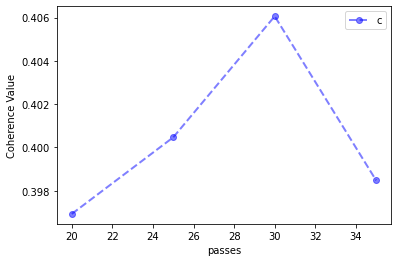

<Figure size 432x288 with 0 Axes>

In [ ]:
limit=40; start=20; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values, 'bo--', linewidth=2, markersize=6, alpha=0.5)
plt.xlabel("passes")
plt.ylabel("Coherence Value")
plt.legend(("coherence_values"), loc='best')
#plt.title('Coherence Value as a function of topic numbers\n from Krebsonsecurity Title Corpus')
plt.show()
plt.savefig('Coherence_values')

In [ ]:
for m, cv in zip(x, coherence_values):
    print('passes =', m, 'has Coherence ValueErrorlue of', round(cv,4))

passes = 10 has Coherence ValueErrorlue of 0.4156
passes = 15 has Coherence ValueErrorlue of 0.4144
passes = 20 has Coherence ValueErrorlue of 0.4159
passes = 25 has Coherence ValueErrorlue of 0.4133
passes = 30 has Coherence ValueErrorlue of 0.4029
passes = 35 has Coherence ValueErrorlue of 0.4
passes = 40 has Coherence ValueErrorlue of 0.4001
passes = 45 has Coherence ValueErrorlue of 0.3998
passes = 50 has Coherence ValueErrorlue of 0.3972
passes = 55 has Coherence ValueErrorlue of 0.3966


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_iter in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=42, update_every=1, chunksize=700, passes=30,iterations=num_iter, alpha='auto', per_word_topics=True)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
        
    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=df.Abstract, limit=1000, start=50, step=100)

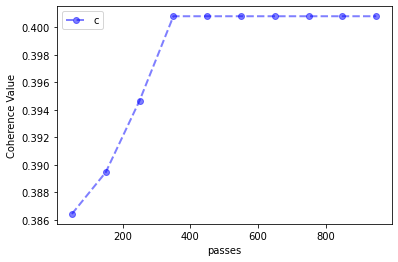

<Figure size 432x288 with 0 Axes>

In [ ]:
limit=1000; start=50; step=100;
x = range(start, limit, step)
plt.plot(x, coherence_values, 'bo--', linewidth=2, markersize=6, alpha=0.5)
plt.xlabel("iterations")
plt.ylabel("Coherence Value")
plt.legend(("coherence_values"), loc='best')
#plt.title('Coherence Value as a function of topic numbers\n from Krebsonsecurity Title Corpus')
plt.show()
plt.savefig('Coherence_values')

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, update_every=1, chunksize=700, passes=30,iterations=350, alpha='auto', per_word_topics=True)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
        
    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=df.Abstract, limit=30, start=2, step=2)

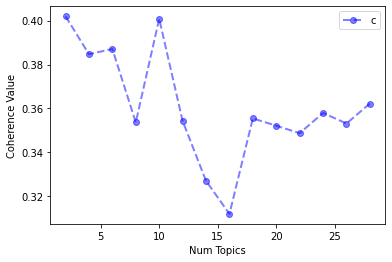

<Figure size 432x288 with 0 Axes>

In [ ]:
limit=30; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values, 'bo--', linewidth=2, markersize=6, alpha=0.5)
plt.xlabel("Num Topics")
plt.ylabel("Coherence Value")
plt.legend(("coherence_values"), loc='best')
#plt.title('Coherence Value as a function of topic numbers\n from Krebsonsecurity Title Corpus')
plt.show()
plt.savefig('Coherence_values')

In [34]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=42, update_every=1, chunksize=700, passes=30, iterations=350, alpha='auto', per_word_topics=True)
lda_model.print_topics()

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

[(0,
  '0.043*"customer" + 0.024*"address" + 0.022*"giant" + 0.019*"trust" + 0.016*"record" + 0.015*"trend" + 0.013*"virus" + 0.012*"staff" + 0.012*"release" + 0.008*"member"'),
 (1,
  '0.023*"link" + 0.018*"video" + 0.016*"source" + 0.015*"camera" + 0.014*"monitoring" + 0.013*"chance" + 0.013*"mail" + 0.012*"hand" + 0.012*"family" + 0.011*"thirdparty"'),
 (2,
  '0.041*"attack" + 0.039*"use" + 0.025*"control" + 0.020*"device" + 0.015*"evidence" + 0.014*"issue" + 0.014*"management" + 0.014*"location" + 0.013*"organization" + 0.012*"personal_information"'),
 (3,
  '0.046*"business" + 0.032*"malware" + 0.030*"work" + 0.027*"threat" + 0.026*"industry" + 0.022*"program" + 0.017*"encryption" + 0.017*"vulnerability" + 0.015*"application" + 0.013*"technology"'),
 (4,
  '0.051*"time" + 0.031*"system" + 0.030*"number" + 0.026*"technology" + 0.025*"breach" + 0.024*"email" + 0.021*"world" + 0.020*"account" + 0.016*"secure" + 0.015*"password"'),
 (5,
  '0.041*"online" + 0.039*"year" + 0.032*"part" 

topic0: customer data protection
topic1: Survelliance systems
topic2: system attacks
topic3: malware threats to businesses
topic4: database breaches
topic5: Periodic online reports
topic6: home services companies
topic7: network hacking
topic8: consumer insights
topic9: privacy protection

In [35]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.153842  0.290436       1        1  14.923504
4      0.351750 -0.055587       2        1  14.311805
2     -0.086622  0.116293       3        1  11.968552
3      0.088603 -0.275884       4        1  11.875962
5     -0.094546 -0.147043       5        1  11.204052
6     -0.118184 -0.026375       6        1  10.187486
7     -0.073613  0.032775       7        1   8.115361
8     -0.091774  0.039397       8        1   7.812475
0     -0.071240  0.006842       9        1   5.156068
1     -0.058216  0.019145      10        1   4.444735, topic_info=          Term        Freq       Total Category  logprob  loglift
394    company  704.000000  704.000000  Default  30.0000  30.0000
317   software  499.000000  499.000000  Default  29.0000  29.0000
30        time  613.000000  613.000000  Default  28.0000  28.0000
301    privacy  609.000000  609.000000  Default  27.0000  27.0000
209    network  440.000000  440.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
851        bar   19.758364   20.253664  Topic10  -5.2333   3.0887
1801   section   18.268755   18.763974  Topic10  -5.3117   3.0867
411       mass   17.568938   18.064063  Topic10  -5.3508   3.0857
172     danger   17.352011   17.847294  Topic10  -5.3632   3.0853
163      video   65.333704  105.607221  Topic10  -4.0374   2.6332

[351 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
627       4  0.996560  ability
270       1  0.990127   access
270       3  0.008550   access
380       2  0.999103  account
18        4  0.993919   action
...     ...       ...      ...
2050      7  0.994025     worm
150       2  0.005464     year
150       5  0.994483     year
33        8  0.998948    youre
3865      9  0.961075  zeroday

[341 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 5, 3, 4, 6, 7, 8, 9, 1, 2])

In [ ]:
#Save the lda model from body to a pickle file
with open('lda_body.pickle', 'wb') as f:
    pickle.dump(lda_model, f)

Finding the dominant topic in each sentence

In [ ]:


def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [ ]:

print(type(data))

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

<class 'list'>


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.0151,"time, password, flaw, article, patch, weakness...",One employees are working from their home netw...
1,1,0.0,0.0412,"time, password, flaw, article, patch, weakness...",The most common form of surveillance implement...
2,2,0.0,0.0207,"time, password, flaw, article, patch, weakness...",
3,3,0.0,0.0207,"time, password, flaw, article, patch, weakness...",
4,4,1.0,0.0651,"domain, morning, investigation, evidence, serv...",The main components of the security tool are t...
5,5,0.0,0.0139,"time, password, flaw, article, patch, weakness...",The key was obtained through access to the ser...
6,6,0.0,0.0207,"time, password, flaw, article, patch, weakness...",
7,7,0.0,0.0207,"time, password, flaw, article, patch, weakness...",
8,8,0.0,0.0207,"time, password, flaw, article, patch, weakness...",
9,9,0.0,0.0207,"time, password, flaw, article, patch, weakness...",


count of papers belonging to each topic

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.head(40)

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,0.0,"time, password, flaw, article, patch, weakness...",789.0,0.6342
1.0,0.0,"time, password, flaw, article, patch, weakness...",137.0,0.1101
2.0,0.0,"time, password, flaw, article, patch, weakness...",49.0,0.0394
3.0,0.0,"time, password, flaw, article, patch, weakness...",151.0,0.1214
4.0,1.0,"domain, morning, investigation, evidence, serv...",27.0,0.0217
5.0,0.0,"time, password, flaw, article, patch, weakness...",38.0,0.0305
6.0,0.0,"time, password, flaw, article, patch, weakness...",41.0,0.0330
7.0,0.0,"time, password, flaw, article, patch, weakness...",NaN,NaN
8.0,0.0,"time, password, flaw, article, patch, weakness...",4.0,0.0032
9.0,0.0,"time, password, flaw, article, patch, weakness...",6.0,0.0048
